In [2]:
import pandas as pd
import numpy as np
from numpy import NaN, NAN, nan
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:,.0f}'.format

In [3]:
df = pd.read_excel('../Outputs/GIS_Lump_Excels/Lump0816_365_515.xlsx')

#change 08 and 16 to strings
df['CODE_08'] = df['LU_NO'].astype(str)
df['CODE_16'] = df['LU_CODEN'].astype(str)

# make the new columns for LU08 using string indexing
df['prim_08'] = df['CODE_08'].str[0:1]
df['secon_08'] = df['CODE_08'].str[:2]
df['third_08'] = df['CODE_08'].str[0:3]

# make the new columns for LU16 using string indexing
df['prim_16'] = df['CODE_16'].str[0:1]
df['secon_16'] = df['CODE_16'].str[:2]
df['third_16'] = df['CODE_16'].str[0:3]

#change 08 and 16 to intigers
df['seconint_16'] = df['secon_16'].astype(int)
df['seconint_08'] = df['secon_08'].astype(int)

#convet area to ha
df['AREA_08_ha'] = (df['AREA_08_M2'] / 10000)
df['AREA_16_ha'] = (df['AREA_16_M2'] / 10000)

# Group by land use and calculate the sum of area
df16 = df.groupby('secon_16')['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8 = df.groupby('secon_08')['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

#dflabel = df.groupby('secon_16')['AREA_16_M2'].agg([
    #np.sum,
    #np.mean,
    #np.count_nonzero,]).reset_index()
    

#Change the column names so that they can be concatinated
df16.columns = ['Land Use', 'Sum', 'Mean', 'Std', 'Count non zero']
df8.columns = ['Land Use', 'Sum', 'Mean', 'Std','Count non zero']


concat = pd.concat([df16, df8])

final = pd.merge(df16, df8,
                left_on='Land Use', right_on='Land Use',
                how = 'left')

#Change the column names so for analysis
final.columns = ['Land Use', 'Sum 2016', 'Mean 2016', 'Std 2016', 'Count 2016',
              'Sum 2008', 'Mean 2008', 'Std 2008', 'Count 2008']

final['% Change Area'] = (((final['Sum 2016'] - final['Sum 2008'])- final['Sum 2016'])*100)
final['% Change Count'] = (((final['Count 2016'] - final['Count 2008'])- final['Count 2016'])*100)

#final.fillna(0)

final.to_excel('../Outputs/Pandas_Lump_Excels/grouped_marrakai_Lump0816_365_515.xlsx')

In [25]:
#grouped by primary code and commodity
df16_2 = df.groupby(['prim_16', 'COMMOD_DES'])['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8_2 = df.groupby(['prim_08', 'COMMOD_DES'])['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

In [29]:
df16_2.head()

,prim_16,COMMOD_DES,sum,mean,std,count_nonzero
0,3,,52,7,5,8
1,4,,"11,527",10,31,"1,131"
2,4,alkaloid poppies,173,173,nan,1
3,4,alto panicum and mekong grass,28,28,nan,1
4,4,avocado,0,0,nan,1


In [26]:
#grouped by commodity only
df16_3 = df.groupby('COMMOD_DES')['AREA_16_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

df8_3 = df.groupby('COMMOD_DES')['AREA_08_ha'].agg([
    np.sum,
    np.mean,
    np.std,
    np.count_nonzero]).reset_index()

In [42]:
df16_3.head()

,COMMOD_DES,sum,mean,std,count_nonzero
0,,"11,718",10,30,"1,224"
1,alkaloid poppies,173,173,nan,1
2,alto panicum and mekong grass,28,28,nan,1
3,avocado,0,0,nan,1
4,bamboo,4,1,0,5


In [34]:
type(df16_3)

pandas.core.frame.DataFrame

Text(0.5,1,'Land Use 2016\nCommodity')

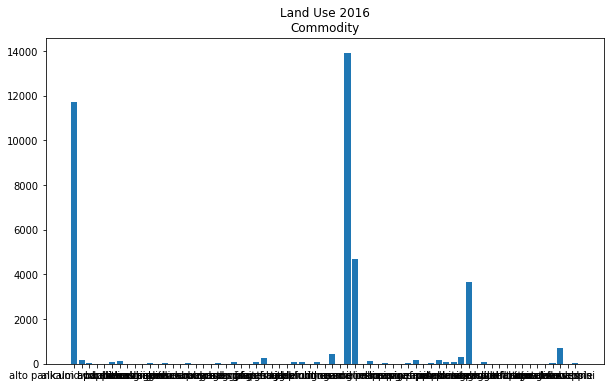

In [43]:
#Plot a bar graph
Commodity = df16_3['COMMOD_DES']
Area = df16_3['sum']
plt.bar(x,y, label='Area')
plt.title("Land Use 2016\nCommodity")



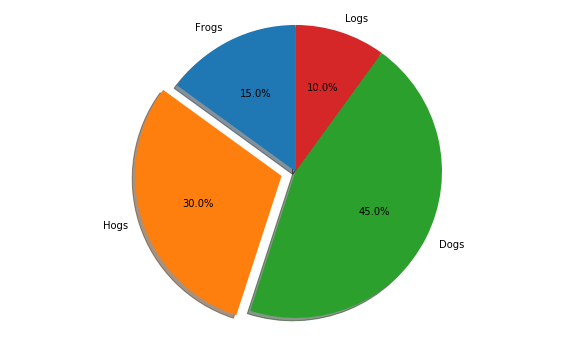

In [44]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

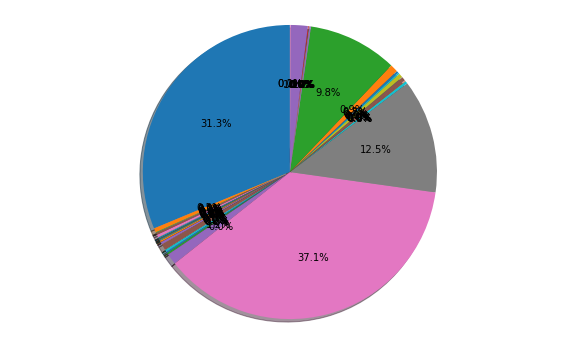

In [60]:
import matplotlib.pyplot as plt

labels = df16_3['COMMOD_DES']
area = df16_3['sum']
fig1, ax1 = plt.subplots()
ax1.pie(area, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [ ]:
def graph_stock(stock):
    
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1),(0,0))

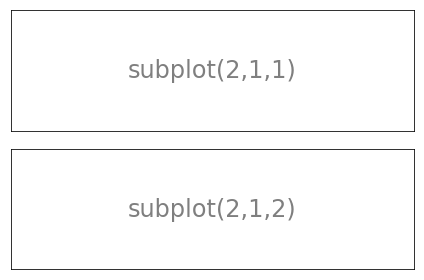

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.subplot(2, 1, 1)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,1,1)', ha='center', va='center',
        size=24, alpha=.5)

plt.subplot(2, 1, 2)
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'subplot(2,1,2)', ha='center', va='center',
        size=24, alpha=.5)

plt.tight_layout()
plt.show()

In [2]:
df.info()

NameError: name 'df' is not defined

In [ ]:
final.info()

No handles with labels found to put in legend.


Text(0.5,1,'interesting graph\nCheck out my line graph')

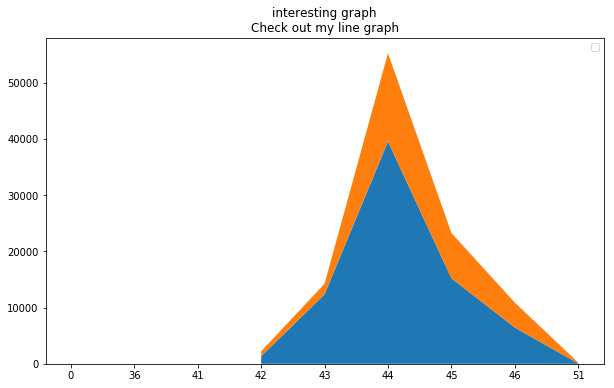

In [15]:
#Plot a stack plot
plt.title("interesting graph\nCheck it out")
x = final['Land Use']

y1 = final['Sum 2008']
y2 = final['Sum 2016']

plt.stackplot(x, y1, y2)

plt.title("interesting graph\nCheck out my line graph")

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = final['Sum 2008']
x1 = final['Sum 2016']

X = np.arange(4)
plt.bar(data['x'], color = 'b', width = 0.25)
plt.bar(data['x1'], color = 'g', width = 0.25)


plt.show()

TypeError: list indices must be integers or slices, not str

NameError: name 'men_means' is not defined

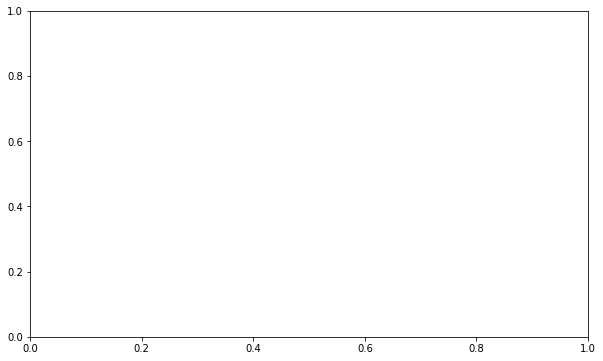

In [16]:
import numpy as np
import matplotlib.pyplot as plt


N = 5
mean_2008 = final['Mean 2008']
mean_2008_std = final['Std 2008']

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, men_means, width, color='red', yerr=men_std)

mean_2016 = final['Mean 2016']
mean_2016_std = final['Std 2016']
rects2 = ax.bar(ind + width, women_means, width, color='dodgerblue', yerr=women_std)

# add some text for labels, title and axes ticks
ax.set_ylabel('Land Use')
ax.set_title('Mean Area')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['LU 1', 'Lu 2'])

ax.legend((rects1[0], rects2[0]), ('2008', '2016'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()